### Taking average of each bundle for dki_md

In [3]:
import afqinsight as ai 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
from numpy import nanmean

In [7]:
nodes = pd.read_csv('combined_tract_profiles.csv')

In [11]:
buddles = sorted(list(set(nodes["tractID"])))

In [8]:
node_avg = nodes.groupby(['tractID', 'subjectID']).agg(nanmean)

In [9]:
dki_md = pd.merge(node_avg.loc["ARC_L", :], node_avg.loc["ARC_R", :], on="subjectID", how="outer")[["dki_md_x", "dki_md_y"]]

In [10]:
dki_md = dki_md.rename(columns={"dki_md_x": "ARC_L", "dki_md_y": "ARC_R"})

In [13]:
for bundle in buddles[2:]:
    dki_md = pd.merge(dki_md, node_avg.loc[bundle, "dki_md"], on="subjectID", how="outer").rename(columns={"dki_md": bundle})

In [14]:
df = pd.read_csv('participant_data.tsv', sep = '\t')

In [15]:
all_data = pd.merge(dki_md, df, left_on="subjectID", right_on="Observations", how="outer")

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
dki_md_imp = imputer.fit_transform(dki_md)

### NMF with 2 components

In [21]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(dki_md_imp)
H = model.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


### PCA with 2 components

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
pca_2 = PCA(n_components=2)
#dki_fa_imp_nor = scaler.fit_transform(dki_fa_imp)
x_2 = pca_2.fit_transform(dki_md_imp)

In [23]:
c = pca_2.components_

Text(0.5, 1.0, '')

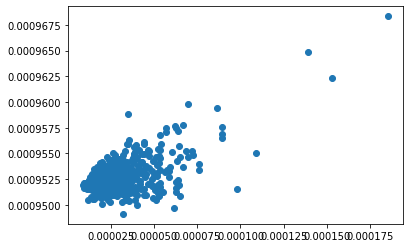

In [24]:
loss_nmf_2 = []
loss_pca_2 = []
for i in range(641):
    loss_nmf_2.append(np.sqrt(np.mean(((W[i, :]@H)-dki_md_imp[i, :])**2)))
    loss_pca_2.append(np.sqrt(np.mean(((x_2[i, :]@c)-dki_md_imp[i, :])**2)))
fig1, ax1 = plt.subplots()
ax1.scatter(loss_nmf_2, loss_pca_2)

ax1.title
# compare loss b/w nmp & pca, scatterplot loss of these two

### NMF with 3 components

In [25]:
from sklearn.decomposition import NMF
model_3 = NMF(n_components=3, init='random', random_state=0)
W_3 = model_3.fit_transform(dki_md_imp)
H_3 = model_3.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


### PCA with 3 components

In [26]:

#scaler = StandardScaler()
pca_3 = PCA(n_components=2)
#dki_fa_imp_nor = scaler.fit_transform(dki_fa_imp)
x_3 = pca_3.fit_transform(dki_md_imp)

In [27]:
c_3 = pca_3.components_

TypeError: 'Text' object is not callable

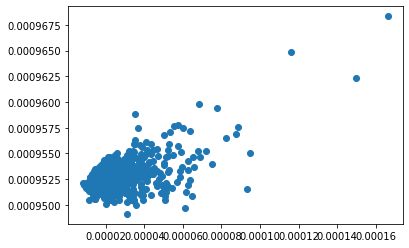

In [29]:
loss_nmf_3 = []
loss_pca_3 = []
for i in range(641):
    loss_nmf_3.append(np.sqrt(np.mean(((W_3[i, :]@H_3)-dki_md_imp[i, :])**2)))
    loss_pca_3.append(np.sqrt(np.mean(((x_3[i, :]@c_3)-dki_md_imp[i, :])**2)))
fig2, ax2 = plt.subplots()
ax2.scatter(loss_nmf_3, loss_pca_3)

ax2.title('loss comparasion b/w PCA & NMF')
# compare loss b/w nmp & pca, scatterplot loss of these two

### NMF with 4 components

In [30]:
from sklearn.decomposition import NMF
model_4 = NMF(n_components=3, init='random', random_state=0)
W_4 = model_4.fit_transform(dki_md_imp)
H_4 = model_4.components_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [31]:
W_4.shape

(641, 3)

In [32]:
H_4.shape

(3, 18)

### PCA with 4 components

In [33]:

#scaler = StandardScaler()
pca_4 = PCA(n_components=2)
#dki_fa_imp_nor = scaler.fit_transform(dki_fa_imp)
x_4 = pca_4.fit_transform(dki_md_imp)

In [34]:
c_4 = pca_4.components_

TypeError: 'Text' object is not callable

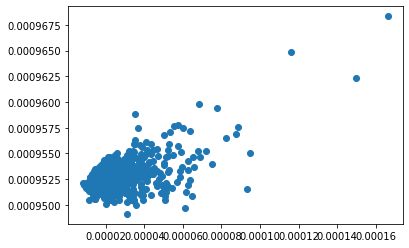

In [35]:
loss_nmf_4 = []
loss_pca_4 = []
for i in range(641):
    loss_nmf_4.append(np.sqrt(np.mean(((W_4[i, :]@H_4)-dki_md_imp[i, :])**2)))
    loss_pca_4.append(np.sqrt(np.mean(((x_4[i, :]@c_4)-dki_md_imp[i, :])**2)))
fig4, ax4 = plt.subplots()
ax4.scatter(loss_nmf_4, loss_pca_4)

ax4.title('loss comparasion b/w PCA & NMF')
# compare loss b/w nmp & pca, scatterplot loss of these two